In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Loading the dataset
file_path = r'C:\Users\MMC\Desktop\Housing.csv'
housing_data = pd.read_csv(file_path)

In [20]:
# 2. Displaying basic information about the dataset
print("Dataset Info:")
print(housing_data.info())

print("\nFirst few rows of the dataset:")
print(housing_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420       

In [29]:
# 3. Data Cleaning - Checking for missing values
print("\nMissing values in each column:")
print(housing_data.isnull().sum())

# Separating numerical and categorical columns
numerical_cols = housing_data.select_dtypes(include=[np.number]).columns
categorical_cols = housing_data.select_dtypes(include=[object]).columns
print(numerical_cols)
print(categorical_cols)

# Imputing missing values
housing_data[numerical_cols] = housing_data[numerical_cols].fillna(housing_data[numerical_cols].median())
housing_data[categorical_cols] = housing_data[categorical_cols].fillna(housing_data[categorical_cols].mode().iloc[0])

# Verifying that if there are any missing values left
print("\nMissing values after cleaning:")
print(housing_data.isnull().sum())



Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

Missing values after cleaning:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [30]:
# 4. Data Preprocessing - One-hot encoding for categorical features
housing_data_encoded = pd.get_dummies(housing_data, drop_first=True)

# Checking columns after encoding
print("\nColumn names after encoding:")
print(housing_data_encoded.columns)


Column names after encoding:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [23]:
# 5. Selecting numerical columns for scaling
# Selecting only the numerical columns after encoding
numerical_cols = housing_data_encoded.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nNumerical columns to be scaled: {numerical_cols}")

# Applying scaling to only the numerical columns
scaler = StandardScaler()
housing_data_encoded[numerical_cols] = scaler.fit_transform(housing_data_encoded[numerical_cols])



Numerical columns to be scaled: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


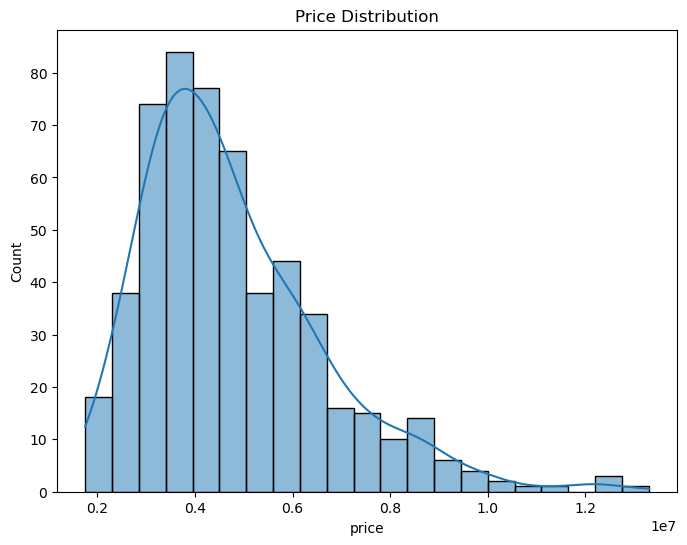

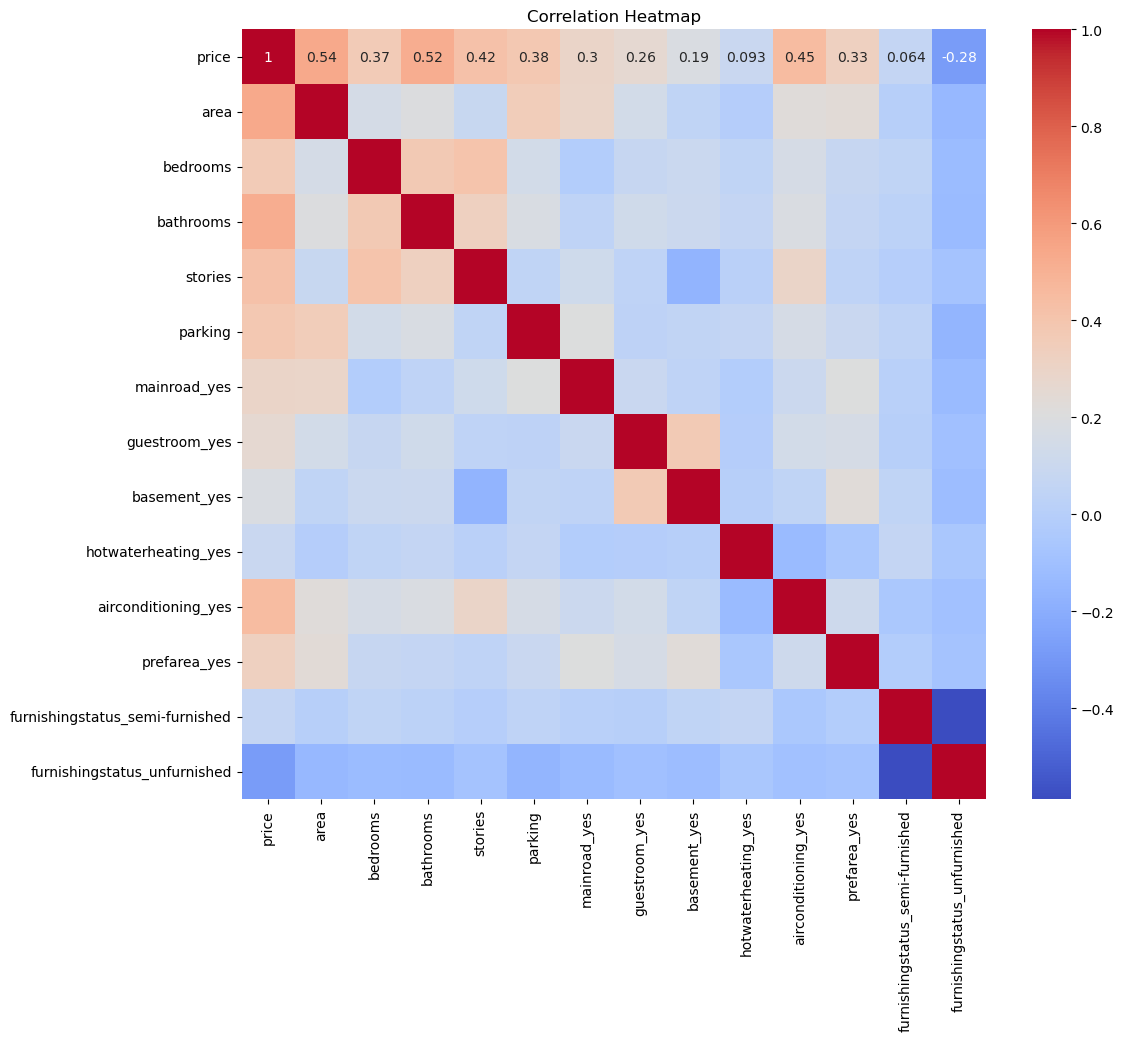

In [24]:
# 6. Data Visualization

# Histogram for the target variable 'price'
plt.figure(figsize=(8,6))
sns.histplot(housing_data['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12,10))
correlation_matrix = housing_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [25]:
# 7. Model Selection and Training

# Separating features (X) and target (y)
X = housing_data_encoded.drop('price', axis=1) 
y = housing_data_encoded['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression Model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)


LinearRegression()

In [26]:
# 8. Model Evaluation

# Predicting house prices on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Comparing actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted values:")
print(comparison_df.head())



Mean Squared Error: 0.5023642289784901
R-squared: 0.6529242642153175

Actual vs Predicted values:
       Actual  Predicted
316 -0.378188   0.212939
77   1.007785   1.315333
360 -0.565482  -0.886630
90   0.895409  -0.082759
493 -1.052446  -0.787748
